In [1]:
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt

from xgboost import XGBClassifier
from sklearn.model_selection import train_test_split, GridSearchCV
from sklearn.metrics import precision_score, recall_score, f1_score, roc_auc_score, accuracy_score,make_scorer, confusion_matrix

import pickle

In [2]:
df = pd.read_csv("imputed_dataset.csv", index_col=0)

In [3]:
df.head()

,Hour,HR,O2Sat,Temp,MAP,Resp,FiO2,SaO2,AST,BUN,...,Lactate,Bilirubin_total,TroponinI,Hct,Hgb,WBC,Platelets,Age,Gender,SepsisLabel
0,0,118.0,100.0,37.17,73.0,12.0,0.5,56.0,17.0,15.0,...,2.9,0.5,6.48,28.8,9.8,23.4,180.0,68.54,0,0
1,1,65.0,100.0,36.90,72.0,16.5,0.4,53.0,74.0,24.0,...,0.7,0.7,0.08,34.5,11.1,5.4,462.0,68.54,0,0
2,2,78.0,100.0,37.28,42.5,20.0,1.0,98.0,397.0,16.0,...,2.0,1.6,0.07,29.9,10.5,7.1,150.0,68.54,0,0
3,3,73.0,100.0,37.33,72.0,17.0,1.0,98.0,20.0,10.0,...,1.0,2.0,0.09,35.0,11.8,3.4,336.0,68.54,0,0
4,4,70.0,100.0,36.80,74.0,14.0,0.4,99.0,26.0,23.0,...,0.7,0.9,0.17,29.7,9.5,11.3,330.0,68.54,0,0


### Class Imbalance

In [4]:
df["SepsisLabel"].value_counts()

0    1027767
1      20808
Name: SepsisLabel, dtype: int64

In [5]:
X = df.drop('SepsisLabel', axis=1)
y = df['SepsisLabel']

X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.30, random_state=42)

In [6]:
print(X_train.shape)
print(X_test.shape)
print(y_train.shape)
print(y_test.shape)

(734002, 22)
(314573, 22)
(734002,)
(314573,)


In [7]:
y_train.value_counts()

0    719469
1     14533
Name: SepsisLabel, dtype: int64

In [8]:
y_test.value_counts()

0    308298
1      6275
Name: SepsisLabel, dtype: int64

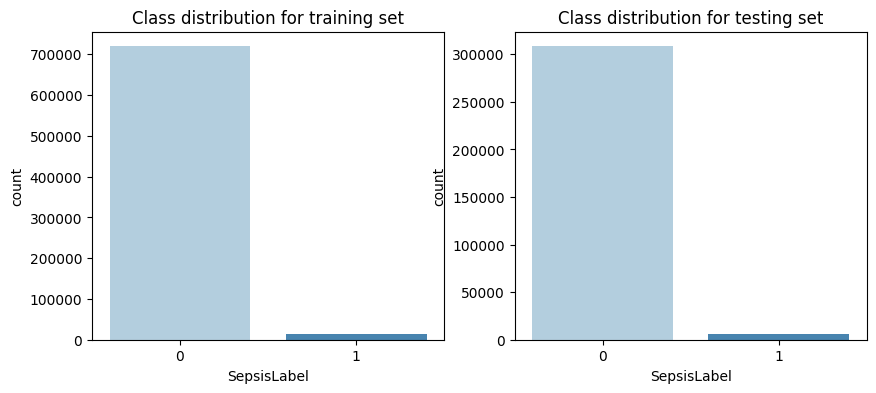

In [9]:
f, axes = plt.subplots(ncols=2, figsize=(10,4))

sns.countplot(x=y_train, palette="Blues",ax=axes[0])
axes[0].set_title("Class distribution for training set")

sns.countplot(x=y_test, palette="Blues",ax=axes[1])
axes[1].set_title("Class distribution for testing set")

plt.show()

### Correlation

In [10]:
df.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 1048575 entries, 0 to 1048574
Data columns (total 23 columns):
 #   Column           Non-Null Count    Dtype  
---  ------           --------------    -----  
 0   Hour             1048575 non-null  int64  
 1   HR               1048575 non-null  float64
 2   O2Sat            1048575 non-null  float64
 3   Temp             1048575 non-null  float64
 4   MAP              1048575 non-null  float64
 5   Resp             1048575 non-null  float64
 6   FiO2             1048575 non-null  float64
 7   SaO2             1048575 non-null  float64
 8   AST              1048575 non-null  float64
 9   BUN              1048575 non-null  float64
 10  Chloride         1048575 non-null  float64
 11  Creatinine       1048575 non-null  float64
 12  Glucose          1048575 non-null  float64
 13  Lactate          1048575 non-null  float64
 14  Bilirubin_total  1048575 non-null  float64
 15  TroponinI        1048575 non-null  float64
 16  Hct              1

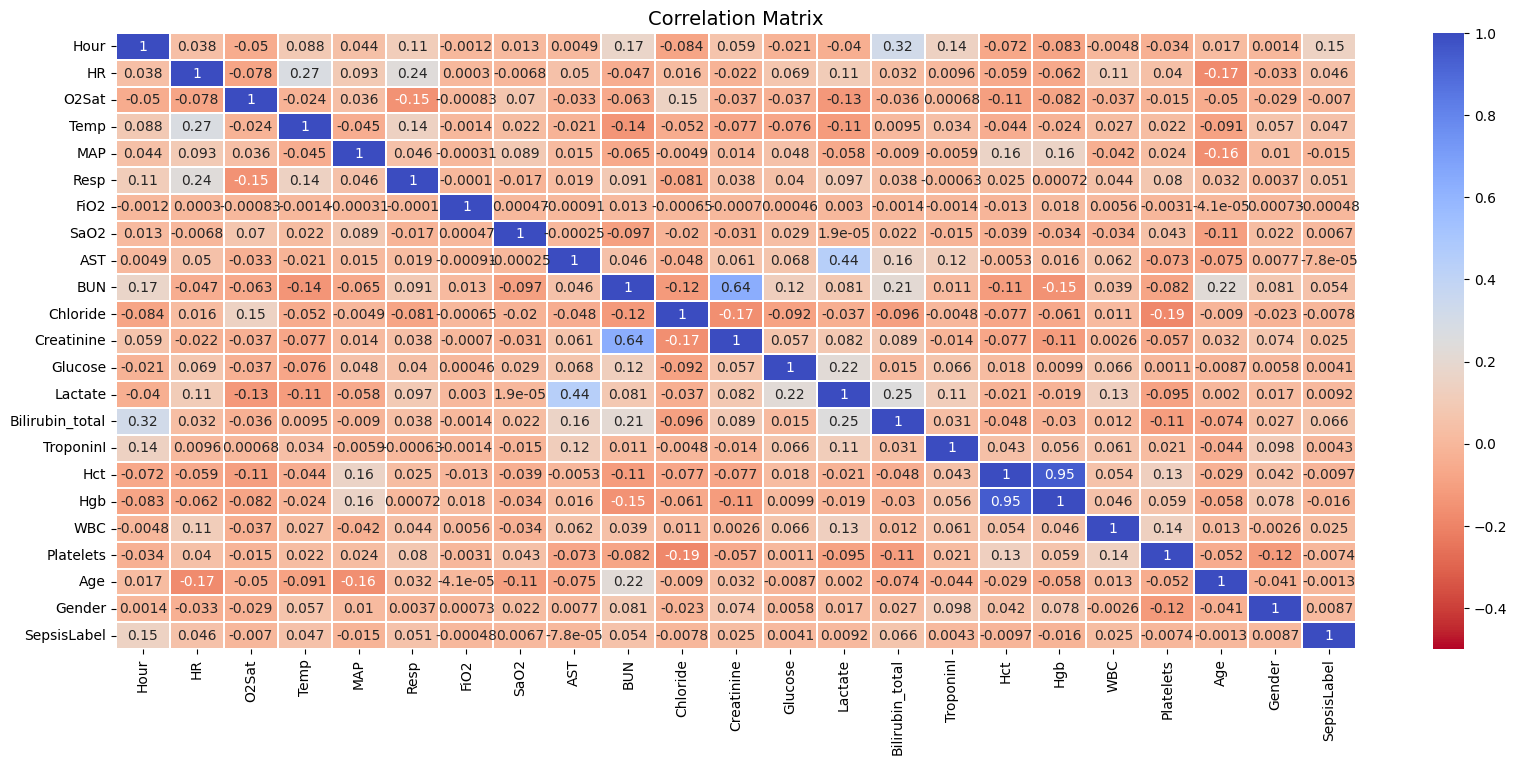

In [11]:
plt.figure(figsize=(20, 8))
sns.heatmap(df.corr(), cmap='coolwarm_r', linewidths=0.2, annot = True, vmin=-0.5, vmax=1)
plt.title('Correlation Matrix', fontsize=14)
plt.show()

In [12]:
df.corr()["SepsisLabel"].sort_values(ascending=False)

SepsisLabel        1.000000
Hour               0.146235
Bilirubin_total    0.065532
BUN                0.053858
Resp               0.051224
Temp               0.047268
HR                 0.045930
WBC                0.025428
Creatinine         0.025378
Lactate            0.009152
Gender             0.008724
SaO2               0.006673
TroponinI          0.004313
Glucose            0.004099
AST               -0.000078
FiO2              -0.000478
Age               -0.001348
O2Sat             -0.007033
Platelets         -0.007382
Chloride          -0.007790
Hct               -0.009687
MAP               -0.014558
Hgb               -0.016102
Name: SepsisLabel, dtype: float64

### Model Building

In [13]:
xgb = XGBClassifier(objective="binary:logistic")
xgb.fit(X_train, y_train)
train_pred = xgb.predict(X_train)
test_pred = xgb.predict(X_test)

print("Performance on Training dataset")
print("Accuracy: ",accuracy_score(y_train, train_pred))
print("Precision: ",precision_score(y_train, train_pred))
print("Recall: ",recall_score(y_train, train_pred))
print("F1 Score: ",f1_score(y_train, train_pred))
print("AUC ROC Score: ",roc_auc_score(y_train, train_pred))

print("\nPerformance on Testing dataset")
print("Accuracy: ",accuracy_score(y_test, test_pred))
print("Precision: ",precision_score(y_test, test_pred))
print("Recall: ",recall_score(y_test, test_pred))
print("F1 Score: ",f1_score(y_test, test_pred))
print("AUC ROC Score: ",roc_auc_score(y_test, test_pred))

Performance on Training dataset
Accuracy:  0.9810954193585304
Precision:  0.9481582537517054
Recall:  0.047822197756829284
F1 Score:  0.09105201100484737
AUC ROC Score:  0.5238846905133566

Performance on Testing dataset
Accuracy:  0.9801317977067326
Precision:  0.5925925925925926
Recall:  0.012749003984063745
F1 Score:  0.0249609984399376
AUC ROC Score:  0.5062853025810723


### Hyperparameter Tuning

In [14]:
param_grid = {'learning_rate': [0.1, 0.01],
              'scale_pos_weight': [1, 10, 50, 100]}

scoring = make_scorer(f1_score)

grid_search = GridSearchCV(estimator=xgb, param_grid=param_grid, scoring=scoring, cv=5)

grid_search.fit(X_train, y_train)

best_params = grid_search.best_params_

print("Best Hyperparameters:", best_params)

Best Hyperparameters: {'learning_rate': 0.1, 'scale_pos_weight': 10}


In [15]:
final_model = XGBClassifier(**best_params, objective="binary:logistic")
final_model.fit(X_train, y_train)

y_pred = final_model.predict(X_test)

print("Performance of final model")
print("Accuracy: ",accuracy_score(y_test, y_pred))
print("Precision: ",precision_score(y_test, y_pred))
print("Recall: ",recall_score(y_test, y_pred))
print("F1 Score: ",f1_score(y_test, y_pred))
print("AUC ROC Score: ",roc_auc_score(y_test, y_pred))

Performance of final model
Accuracy:  0.9572913123503924
Precision:  0.1657329598506069
Recall:  0.28286852589641437
F1 Score:  0.20900794818957905
AUC ROC Score:  0.6269434131859641


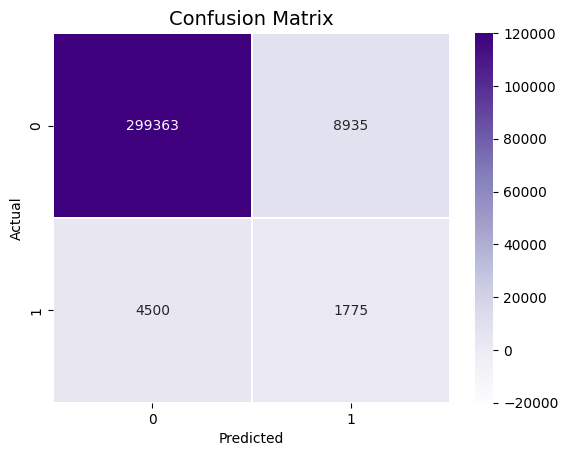

In [16]:
cm = confusion_matrix(y_test,y_pred)

sns.heatmap(cm,  annot=True, fmt='d', cmap="Purples", vmin=-20000, vmax=120000, linewidths=0.1)
plt.title("Confusion Matrix", fontsize=14)
plt.xlabel("Predicted")
plt.ylabel("Actual")
plt.show()

### Model Pickling

In [17]:
pickle.dump(final_model, open('model.pkl', 'wb'))

In [18]:
training_dataset = pd.concat([X_train,y_train], axis=1)
training_dataset.reset_index(drop=True, inplace=True)
training_dataset

,Hour,HR,O2Sat,Temp,MAP,Resp,FiO2,SaO2,AST,BUN,...,Lactate,Bilirubin_total,TroponinI,Hct,Hgb,WBC,Platelets,Age,Gender,SepsisLabel
0,2,102.0,100.0,37.39,74.00,24.0,0.50,69.0,46.0,15.0,...,1.66,0.1,0.05,31.2,10.1,11.6,289.0,71.41,0,0
1,61,103.0,77.0,37.70,87.00,28.0,0.95,96.0,41.0,9.0,...,7.90,1.5,15.50,33.1,11.7,16.8,409.0,64.19,0,0
2,14,67.0,95.0,37.80,72.00,21.0,0.80,97.0,31.0,9.0,...,1.10,0.5,6.62,39.0,12.7,16.0,154.0,67.00,1,0
3,40,96.0,96.0,36.44,64.83,16.0,0.40,97.0,38.0,18.0,...,5.00,5.0,1.60,22.0,8.0,7.8,162.0,78.69,1,0
4,1,80.0,100.0,36.67,87.33,11.0,0.40,99.0,26.0,15.0,...,0.83,0.7,0.33,32.0,10.8,11.7,294.0,45.56,0,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
733997,2,93.0,100.0,36.56,98.50,16.0,0.50,98.0,82.0,13.0,...,1.30,0.5,0.01,35.0,11.9,10.6,76.0,54.59,1,0
733998,120,78.0,100.0,36.94,83.00,16.0,0.40,97.0,79.0,14.0,...,0.70,8.8,15.80,34.6,11.6,11.7,270.0,80.06,0,0
733999,35,58.0,100.0,36.89,62.00,18.0,0.50,98.0,22.0,18.0,...,2.40,1.4,1.00,29.0,10.5,6.7,198.0,69.87,0,0
734000,36,65.0,88.0,37.60,81.67,17.0,0.35,96.0,30.0,16.0,...,1.29,0.6,2.07,39.1,13.1,9.7,303.0,66.46,1,0


In [19]:
training_dataset.to_csv("training_dataset.csv")